In [1]:
from IPython.display import *
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

Сгенерируем теоретическую генеральную совокупность.

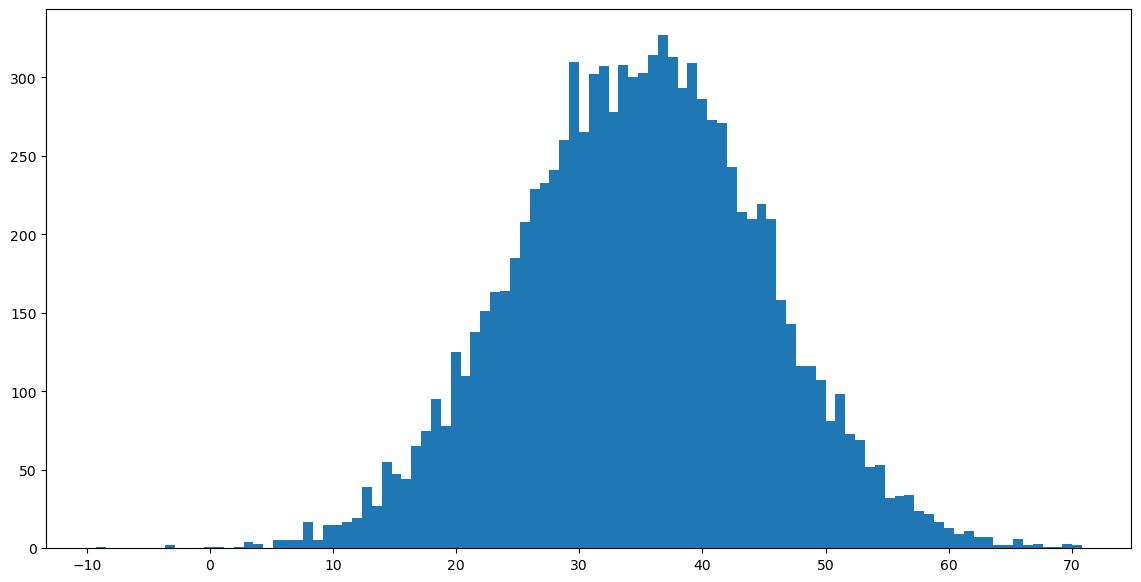

In [2]:
np.random.seed(3106)
distrib = stats.norm(loc=35, scale=10)
gen_pop = distrib.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
axl = plt.subplot(111)
plt.hist(gen_pop, 100)
plt.show()

Извлечём из нашей совокупности 3 случайные подгруппы по 50 заказов в каждой - пусть это наблюдения, полученные в реальном эксперименте.

In [3]:
sample_groups = []
for i in range(3):
    sample_groups.append(np.random.choice(gen_pop, size=50).astype(int))
sample_groups = np.array(sample_groups)
sample_groups

array([[40, 22, 43, 44, 18, 47, 46, 36, 38, 48, 36, 33, 33, 39, 36, 34,
        29, 18, 42, 38, 35, 18, 47, 26, 15, 23, 24, 23, 38, 50, 33, 35,
        17, 10, 55, 27, 21, 45, 29, 20, 12, 30, 44, 62, 33,  9, 21, 34,
        42, 19],
       [17, 35, 33, 49, 45, 37, 28, 46, 30, 32, 36, 34, 51, 39, 36, 36,
        33, 29, 35, 18, 20, 46, 47, 36, 48, 39, 37, 35, 33, 42, 35, 40,
        35, 56, 11, 27, 44, 22, 47, 51, 21, 35, 30, 12, 37, 40, 20, 48,
        60, 22],
       [28, 30, 22, 39, 50, 46, 44, 35, 32, 31, 29, 39, 48, 32, 23, 40,
        28, 43, 64, 40, 35, 26, 38, 35, 34, 28, 39, 41, 27, 46, 38,  3,
        36, 35, 38, 29, 41, 25, 36, 42, 24, 36, 16, 42, 49, 44, 42, 39,
        13, 44]])

Рассчитаем:
* среднее каждой выборки и стандартное отклонение (голубые линии на графике)
* среднее средних и стандартное отклонение средних (оранжевая линия на графике)

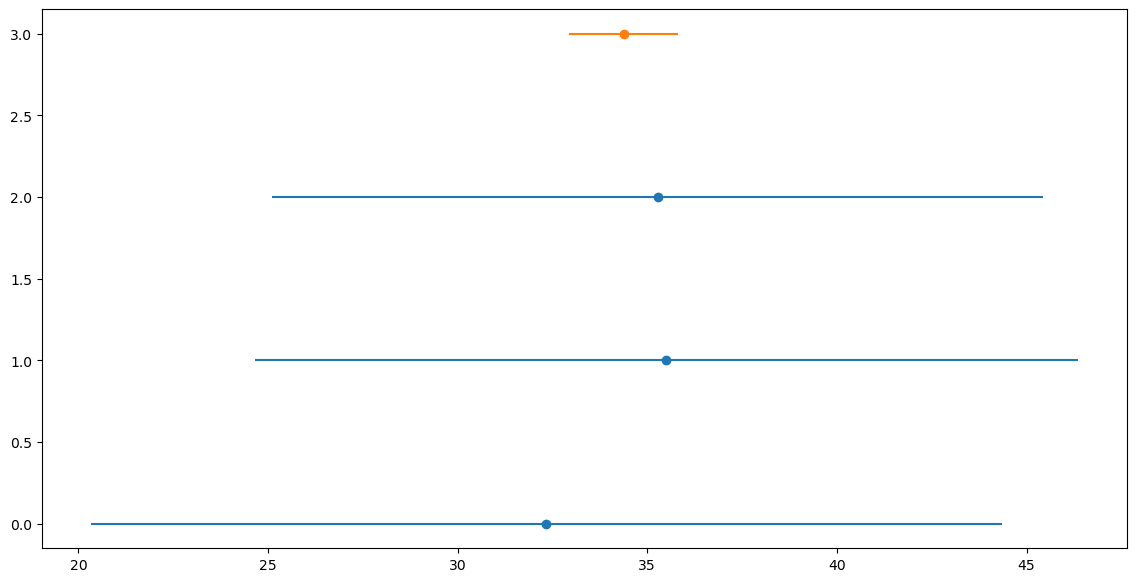

In [4]:
x = np.mean(sample_groups, axis=1)
y = np.arange(sample_groups.shape[0])
e = np.std(sample_groups, axis=1)

fig = plt.figure(figsize=(14, 7))
plt.errorbar(x, y, xerr=e, linestyle='None', marker='o')
plt.errorbar(np.mean(x), y.shape[0], xerr=np.std(x), linestyle='None', marker='o')

plt.show()

**1) формулируем гипотезы Н0 и Н1;**

Н0 - выборки взяты из одного распредения (средние всех выборок равны)

Н1 - выборки взяты из разных распределений (хотя бы пара средних различается между собой)

**2) фиксируем уровень значимости критерия значимости;**

Зададим $\alpha$ на уровне значимости 5%.

**3) выбирается статистический критерий для проверки гипотезы;**

Будем использовать ANOVA.

**4) по выборочным данным вычисляется значение К-наблюдаемое по распредению выбранной статистики**

In [5]:
num_of_groups = sample_groups.shape[0]

In [6]:
# Рассчитаем среднее по всем наблюдениям:
X_mean = sample_groups.mean()
X_mean

34.373333333333335

In [7]:
# Рассчитаем среднее для каждой группы
group_means = sample_groups.mean(axis=1)
group_means_reshaped = group_means.reshape(num_of_groups, 1)

In [15]:
# SSW - сумма квадратов отклонений для каждой из групп
SSW = np.sum((sample_groups - group_means_reshaped) ** 2)
SSW

18251.800000000003

In [16]:
# SSB - сумма квадратов отклонений групповых средних от общего среднего всех наблюдений
group_lengths = [x.shape[0] for x in sample_groups]

SSB =  np.sum((group_means - X_mean) ** 2 * group_lengths)
SSB

311.2933333333327

In [17]:
# F - статистика Фишера
m = num_of_groups
N = np.sum(group_lengths)

F = (SSB / (m - 1)) / (SSW / (N - m))
F

1.2535782772110122

Воспользуемся пакетом stats для аналогичного расчета:

In [11]:
F, p = stats.f_oneway(*sample_groups)

In [12]:
# F-наблюдаемое
F

1.253578277211015

**5) с учётом выбранного уровня значимости вычисляется критическая область и область принятия гипотезы, то есть находится К-критическое**

In [13]:
# F-критическое
F_critical = stats.f.ppf(q=1-.05, dfn=m, dfd = N - m)
F_critical

2.6661487758521765

**6) найденное значение К-наблюдаемое критерия сравнивается с К-критическое и по результатам сравнения делается вывод**

In [14]:
F < F_critical

True

**Вывод:** мы не можем отвергунть гипотезу Н0

In [18]:
p

0.2885150291132462

In [19]:
p > 0.05

True

Теперь давайте попробуем разобраться, откуда взялось распределение F, с которым мы работали.

Будем из нашей генеральной совокупности извлекать выборки и считать F. Выборки будут также размером 50 и количество выборок будет равно 3, то есть по аналогии с тем же дизайном эксперимента, который мы проводили выше.

In [21]:
def calculate_random_sample_group(sz = 50):
    sample_groups = []
    for i in range(num_of_groups):
        sample_groups.append(np.random.choice(gen_pop, size=sz))
    F, _ = stats.f_oneway(*sample_groups)
    return sample_groups, F

Fs = []
sgs = []
for i in range(10000):
    sg, F = calculate_random_sample_group()
    Fs.append(F)
    sgs.append(sg)

Распределение приняло определённую форму, такое распределение называется распределение Фишера, на основе рассчитанных статистик по нему мы как раз и принимали решения.

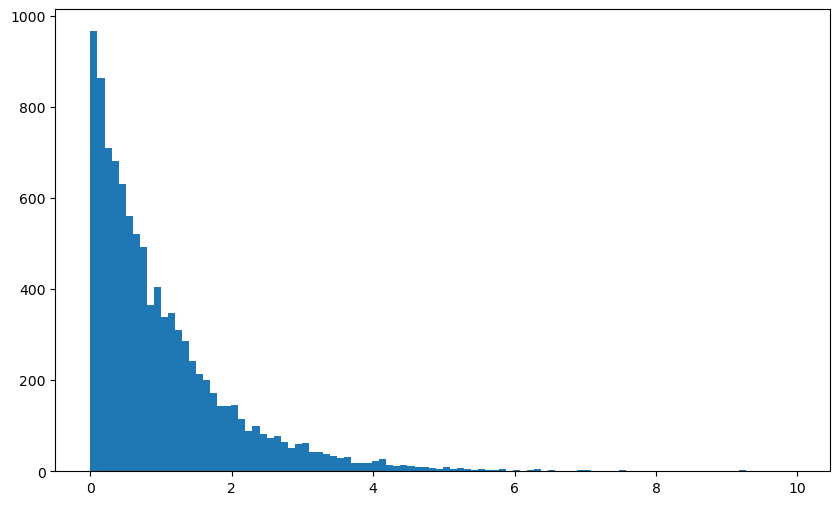

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(Fs, bins=100)
plt.show()